In [23]:
from typing import Tuple, Callable

import matplotlib.pyplot as plt
import numpy as np


## A functions

In [24]:
def DTFT(func: [Callable, np.array], time: np.array, freqs: np.array) -> np.array:
    r"""
    Calculates DTFT of function, using the formula:
    .. math::
        \tilde{x}[f] = \sum_{n=-\infty}^{\infty} x[n]e^{-i*2*\pi*f*n}
    :param func: the function to calculate DTFT of
    :param time: time to evaluate f at
    :param freqs: freqs to evaluate DTFT at
    :return: the DTFT of the function with the given freqs
    """
    x = func(time) if callable(func) else func  # function results
    U = np.exp((-1j) * 2 * np.pi * np.outer(freqs, time))  # DTFT matrix
    return U @ x


def gen_sig_dtft(func: callable, fs: int, min_t=-2, max_t=2, dt=None, min_freq=-20, max_freq=20, freq_step=1e-1):
    """
    Generates a signal with the given parameters
    :param func: Function that creates the signal. gets time or (time,fs) as parameter
    :param fs: sampling frequency - either for creating the time vector or for the func
    :param min_t: minimum time to start with, inclusive
    :param max_t: maximum time to end with, not-inclusive
    :param dt: Default None. If float, is the spacing between points in the
               time vector and time,fs is passed to func
    :param min_freq: minimum frequency to evaluate DTFT on, inclusive
    :param max_freq: maximum frequency to evaluate DTFT on, inclusive
    :param freq_step: the difference between two freqs in the frequencies
                      vector to evaluate DTFT at
    :return: the created signal, time vector, DTFT result, frequency vector
    """
    time = np.arange(min_t, max_t, (1 / fs) if dt is None else dt)
    freqs = np.arange(min_freq, max_freq + freq_step, freq_step)
    y = func(time) if dt is None else func(time.size, fs)

    dtft = DTFT(y, time, freqs)
    return y, time, dtft, freqs


def plot_dtft_with_sig(y, time, dtft, freqs, fig=None, func_ax=None, dtft_ax=None) -> Tuple[
    plt.Figure, plt.Axes, plt.Axes]:
    """
    Plots signal with its DTFT
    :param y: the signal
    :param time: time vector for the signal
    :param dtft: DTFT to plot
    :param freqs: frequencies for which DTFT was calculated
    :param fig: Default None. If None - create a new figure with 2 subplots.
                If matplotlib.pyplot.Figure - use the given figure to plot on
                and assume func_ax and dtft_ax are not None and are of type
                matplotlib.pyplot.Axes
    :param func_ax: axis to plot the function on. If fig is None, creates a new axis
    :param dtft_ax: axis to plot the DTFT on. If fig is None, creates a new axis
    :return: The figure, func axis and DTFT axis
    """
    if not fig:
        fig = plt.figure()
        fig.suptitle(f"Sampled at {int(round(1 / (time[1] - time[0])))}Hz")
        func_ax, dtft_ax = fig.subplots(1, 2)
        func_ax.set_title("function")
        func_ax.set_xlabel("time (sec)")
        func_ax.set_ylabel("value")
        dtft_ax.set_title("DTFT")
        dtft_ax.set_xlabel("Frequency (Hz)")
        func_ax.set_ylabel("Amplitude")
    func_ax.plot(time, y)
    func_ax.scatter(time, y, edgecolors='r', facecolors='none', s=10)
    dtft_ax.plot(freqs, np.abs(dtft))
    dtft_ax.scatter(freqs, np.abs(dtft), edgecolors='r', facecolors='none', s=10)
    return fig, func_ax, dtft_ax


def get_dirac_comb(n_points, fs):
    """
    Returns the dirac comb funciton with n_points (assumes 1ms distance between points)
    corresponding to the given sampling frequency
    :param n_points: number of points in the dirac comb
    :param fs: The sampling frequency of the dirac comb
    :return: the dirac comb
    """
    comb = np.zeros(n_points)
    comb[::1000 // fs] = 1
    return comb


## B+C

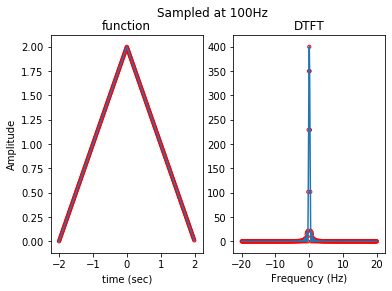

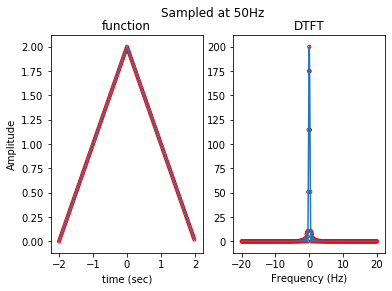

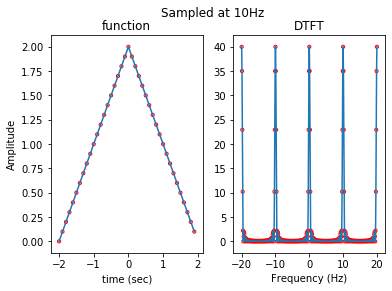

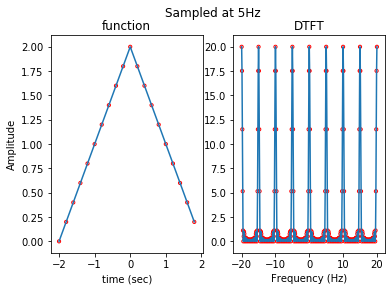

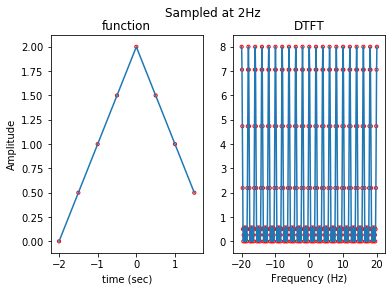

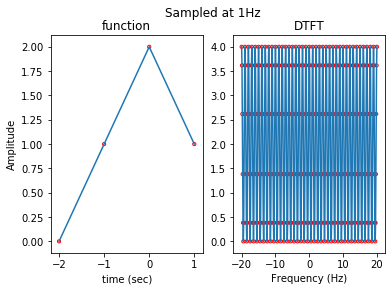

In [25]:
triangle_func = lambda t: (2 - np.abs(t)) * (np.abs(t) < 2)  # define the triangle function
figs, func_axes, dtft_axes = [], [], []
fs_list = [100, 50, 10, 5, 2, 1]
# create signals with differing sampling rates and plot them
for fs in fs_list:
    fig, func_ax, dtft_ax = plot_dtft_with_sig(*gen_sig_dtft(triangle_func, fs))
    figs.append(fig)
    func_axes.append(func_ax)
    dtft_axes.append(dtft_ax)

## D
#### add the dirac comb corresponding to the sampling procedure to the plots

In [26]:
for i, fs in enumerate(fs_list):
    plot_dtft_with_sig(*gen_sig_dtft(get_dirac_comb, fs, min_t=-10, max_t=10, dt=1e-3), figs[i], func_axes[i],
                       dtft_axes[i])
    func_axes[i].legend(["triangle", "dirac comb"])
    dtft_axes[i].legend(["triangle", "dirac comb"])

## E
#### create the signals with the calculated DTFT:

In [27]:
triangle, triangle_time, triangle_dtft, triangle_freqs = gen_sig_dtft(triangle_func, 100)
dirac, dirac_time, dirac_dtft, dirac_freqs = gen_sig_dtft(get_dirac_comb, 100, min_t=-10, max_t=10, dt=1e-3)
# calculate DTFT using convolusion theorem
dtft_of_triangle = np.convolve(dirac_dtft, triangle_dtft, mode="same")

#### plot the functions - should (and are) the same

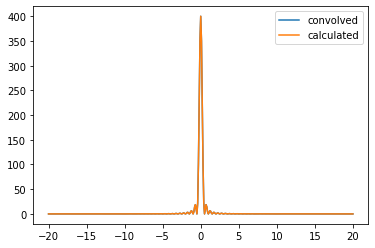

In [28]:
plt.plot(dirac_freqs, np.abs(dtft_of_triangle) / (dirac.size / 10), label="convolved")
plt.plot(dirac_freqs, np.abs(triangle_dtft), label="calculated")
plt.legend()

